In [1]:
import pandas as pd
import re

Read Twitter sentiments

In [2]:
twitter_data = pd.read_csv('data/positive_negative.csv', names=['text', 'sentiment'])
twitter_data.head()

,text,sentiment
0,на работе был полный пиддес :| и так каждое за...,0
1,Коллеги сидят рубятся в Urban terror а я из-з...,0
2,@elina_4post как говорят обещаного три года жд...,0
3,Желаю хорошего полёта и удачной посадки я буду...,0
4,Обновил за каким-то лешим surf теперь не рабо...,0


Sentiments distribution

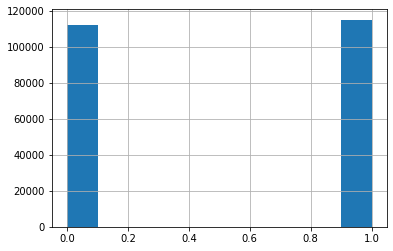

In [3]:
twitter_data['sentiment'].hist()

Read russian books sentiments data

In [4]:
with open('data/rusbooks/rusBooks.txt') as file:
    rusbooks_data = []
    current_sentiment = None
    current_text = ''
    for line in file:
        if '[TEXT' in line:
            current_sentiment = 1 if 'POS' in line else 0
        elif '[/TEXT' in line:
            rusbooks_data.append((current_text, current_sentiment))
            current_sentiment = None
            current_text = ''
        else:
            current_text += line
rusbooks_data = pd.DataFrame(data=rusbooks_data, columns=['text', 'sentiment'])
rusbooks_data.head()

,text,sentiment
0,"Я пару первых страниц пробежала глазами, но сф...",0
1,Знакомый стиль. Вылезти на пародировании знаме...,0
2,"Не понимаю, откуда столько восторженных отзыво...",0
3,Не читать поклонникам хорошего стиля и умной л...,0
4,Давненько я не читал такого... нелитературного...,0


Sentiments distribution

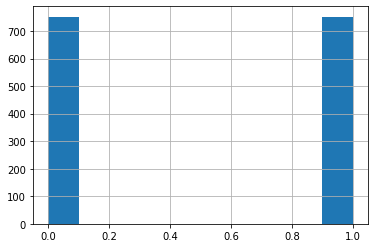

In [5]:
rusbooks_data['sentiment'].hist()

Join data, shuffle and plot distribution

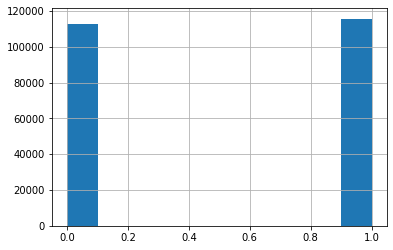

In [6]:
all_data = twitter_data.append(rusbooks_data).sample(frac=1).reset_index(drop=True)
all_data['sentiment'].hist()

Preprocess

In [7]:
def preprocess_text(text):
    # Lower text
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove @ mentions
    text = re.sub(r"@\S+", "", text)
    # Remove hashtags
    text = re.sub(r"#\S+", "", text)
    # Remove rt (retweets)
    text = re.sub("rt", "", text)
    # Remove unneeded symbols
    text = re.sub(r"[/~/`/@/#/$/%/&/-/_/+/,/.]", "", text)
    # Remove extra spaces
    text = re.sub(" +", ' ', text)
    
    return text

In [8]:
all_data['preprocessed_text'] = all_data['text'].apply(lambda x: preprocess_text(x))
all_data.head()

,text,sentiment,preprocessed_text
0,теперь я знаю чего хочу на НГ:DD ^^ http://t.c...,1,теперь я знаю чего хочу на нг:dd ^^
1,Скоро матч Робин-Локо. Болею сегодня за Рубин ...,1,скоро матч робин-локо болею сегодня за рубин н...
2,@anufrieva__v @_dasha_45 @lolbizante Перестань...,0,перестаньте а (
3,Матвейка милааааш^^ соскучилась по нему) http:...,1,матвейка милааааш^^ соскучилась по нему)
4,@VikiPikiVik блиин:С я и на концеерт хочу тепе...,0,блиин:с я и на концеерт хочу теперь:((((( а т...


Save to file

In [9]:
all_data[['preprocessed_text', 'sentiment']].to_csv('data/preprocessed.csv')